# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+ weather_api_key + "&q="+ city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | nuevo progreso
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | arsikere
Processing Record 16 of Set 1 | inirida
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | slave lake
Processing Record 21 of Set 1 | sirajganj
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 

Processing Record 35 of Set 4 | lashio
Processing Record 36 of Set 4 | olavarria
Processing Record 37 of Set 4 | mehamn
Processing Record 38 of Set 4 | victoria
Processing Record 39 of Set 4 | nsanje
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | warqla
City not found. Skipping...
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | yantai
Processing Record 44 of Set 4 | goderich
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | deputatskiy
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | kangaatsiaq
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | yumen
Processing Record 1 of Set 5 | mmathubudukwane
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | naziya
Processing Record 5 of Set 5 | bardiyah
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | turukhansk
Processing Record 8 of Set 5 | anchorage
P

Processing Record 24 of Set 8 | shelburne
Processing Record 25 of Set 8 | phan rang
City not found. Skipping...
Processing Record 26 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 27 of Set 8 | tangshan
Processing Record 28 of Set 8 | colac
Processing Record 29 of Set 8 | nizhnyaya salda
Processing Record 30 of Set 8 | asekeyevo
Processing Record 31 of Set 8 | panguna
Processing Record 32 of Set 8 | alto longa
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | cabinda
Processing Record 35 of Set 8 | jijiga
Processing Record 36 of Set 8 | kintinku
Processing Record 37 of Set 8 | cabedelo
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | bokspits
City not found. Skipping...
Processing Record 41 of Set 8 | villa maria
Processing Record 42 of Set 8 | arman
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | novoagansk
Processing Record 45 of Set 8 | kieta

Processing Record 12 of Set 12 | casablanca
Processing Record 13 of Set 12 | hambantota
Processing Record 14 of Set 12 | kingman
Processing Record 15 of Set 12 | shirokiy
Processing Record 16 of Set 12 | nata
Processing Record 17 of Set 12 | puri
Processing Record 18 of Set 12 | carballo
Processing Record 19 of Set 12 | teguise
Processing Record 20 of Set 12 | kaliua
Processing Record 21 of Set 12 | talakan
Processing Record 22 of Set 12 | lahat
Processing Record 23 of Set 12 | sao joao batista
Processing Record 24 of Set 12 | mercedes
Processing Record 25 of Set 12 | waddan
Processing Record 26 of Set 12 | imbituba
Processing Record 27 of Set 12 | mackenzie
Processing Record 28 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 29 of Set 12 | bayir
Processing Record 30 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 12 | bargal
City not found. Skipping...
Processing Record 32 of Set 12 | rawah
Processing Record 33 of Set 12 | joshimath
P

In [59]:
city_data

[{'City': 'lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 13.45,
  'Humidity': 94,
  'Cloudiness': 4,
  'Wind Speed': 3.92,
  'Country': 'CL',
  'Date': 1674456166},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 26.17,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 6.95,
  'Country': 'PF',
  'Date': 1674456167},
 {'City': 'kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 22.28,
  'Humidity': 91,
  'Cloudiness': 6,
  'Wind Speed': 2.74,
  'Country': 'US',
  'Date': 1674456167},
 {'City': 'busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 31.76,
  'Humidity': 34,
  'Cloudiness': 0,
  'Wind Speed': 6.72,
  'Country': 'AU',
  'Date': 1674456168},
 {'City': 'mar del plata',
  'Lat': -38.0023,
  'Lng': -57.5575,
  'Max Temp': 16.72,
  'Humidity': 89,
  'Cloudiness': 0,
  'Wind Speed': 3.13,
  'Country': 'AR',
  'Date': 1674455907},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 12.81,
  'Humidity': 47,
  'C

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,13.45,94,4,3.92,CL,1674456166
1,rikitea,-23.1203,-134.9692,26.17,75,0,6.95,PF,1674456167
2,kapaa,22.0752,-159.3190,22.28,91,6,2.74,US,1674456167
3,busselton,-33.6500,115.3333,31.76,34,0,6.72,AU,1674456168
4,mar del plata,-38.0023,-57.5575,16.72,89,0,3.13,AR,1674455907


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,13.45,94,4,3.92,CL,1674456166
1,rikitea,-23.1203,-134.9692,26.17,75,0,6.95,PF,1674456167
2,kapaa,22.0752,-159.3190,22.28,91,6,2.74,US,1674456167
3,busselton,-33.6500,115.3333,31.76,34,0,6.72,AU,1674456168
4,mar del plata,-38.0023,-57.5575,16.72,89,0,3.13,AR,1674455907


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

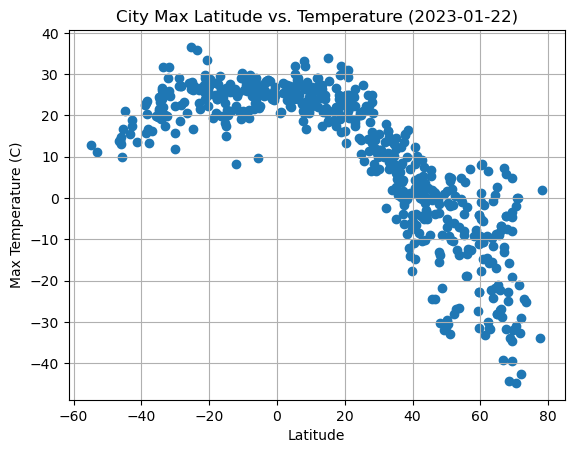

In [114]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Temperature (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

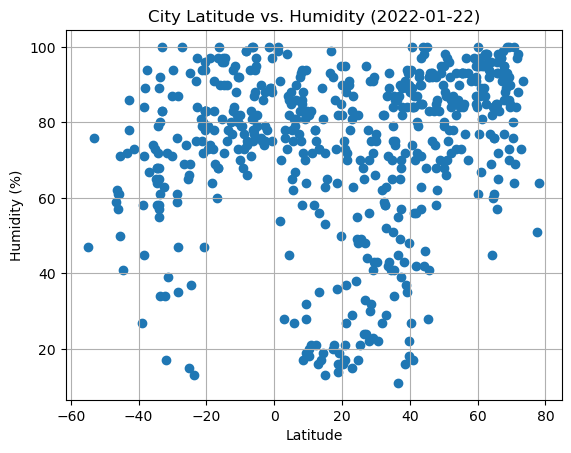

In [115]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

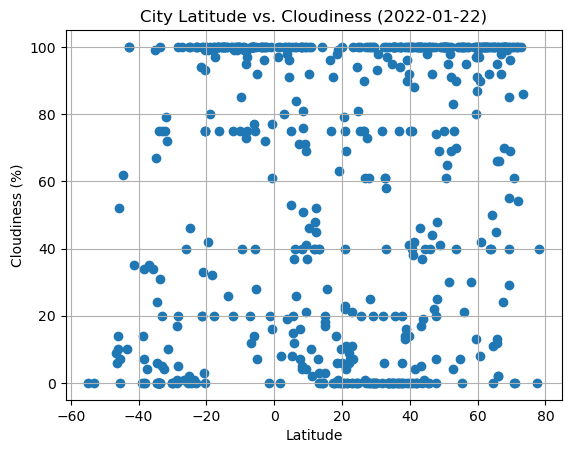

In [116]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

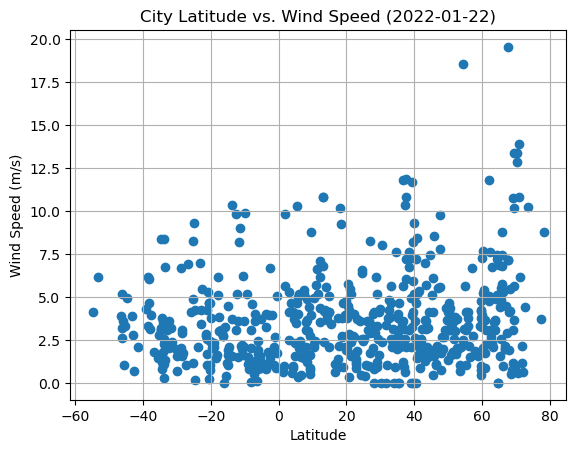

In [117]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def regression(x, y, place):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_value = x * slope + intercept
    regress_equation = f"y = {round(slope.astype('float'), 2)}x + {round(intercept.astype('float'), 2)}"
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, color="b")
    plt.plot(x, regress_value, color="r")
    plt.xlabel('Latitude')
    plt.annotate(regress_equation, place, fontsize=15, color="r")
    
    
    

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kapaa,22.0752,-159.3190,22.28,91,6,2.74,US,1674456167
6,hilo,19.7297,-155.0900,23.49,95,0,2.06,US,1674456120
7,chokurdakh,70.6333,147.9167,-44.77,100,61,0.60,RU,1674456169
9,sao filipe,14.8961,-24.4956,20.63,63,3,4.14,CV,1674455606
11,nuevo progreso,23.1667,-97.9500,17.48,63,100,1.84,MX,1674456170


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,13.45,94,4,3.92,CL,1674456166
1,rikitea,-23.1203,-134.9692,26.17,75,0,6.95,PF,1674456167
3,busselton,-33.6500,115.3333,31.76,34,0,6.72,AU,1674456168
4,mar del plata,-38.0023,-57.5575,16.72,89,0,3.13,AR,1674455907
5,ushuaia,-54.8000,-68.3000,12.81,47,0,4.12,AR,1674456168


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8582965711106274


Text(0, 0.5, 'Max Temp (C)')

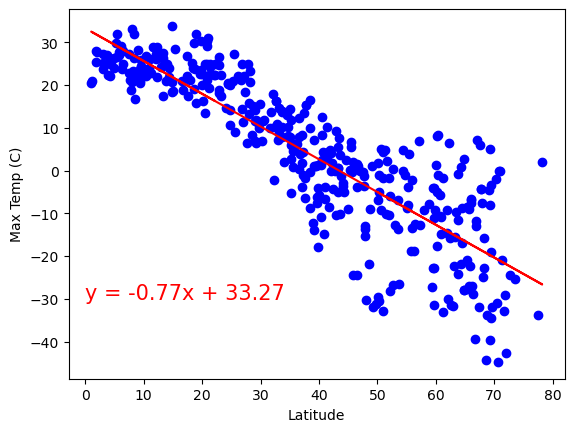

In [99]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"], (0, -30))
plt.ylabel('Max Temp (C)')

The r-value is: 0.4196933710703465


Text(0, 0.5, 'Max Temp (C)')

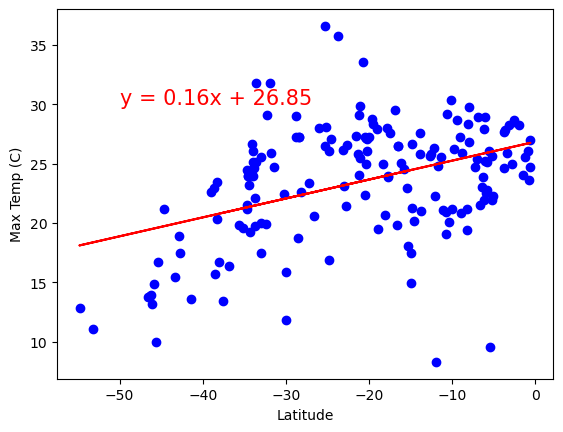

In [100]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"], (-50, 30))
plt.ylabel('Max Temp (C)')

**Discussion about the linear relationship:** The r-value(-0.858) indicate there is a strong and negative correlation between latitude and max temperature in northern hemisphere area. As a result, the max temperature tend to decrease when the distance from the equator increase. However the southern hemisphere area doesn't have the same strong relationship as the northern area.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3588042812417545


Text(0, 0.5, 'Humidity')

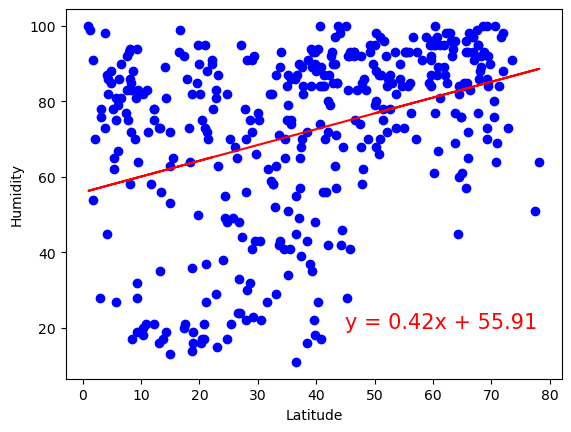

In [102]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df["Humidity"], (45, 20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-value is: 0.4515391591237976


Text(0, 0.5, 'Humidity')

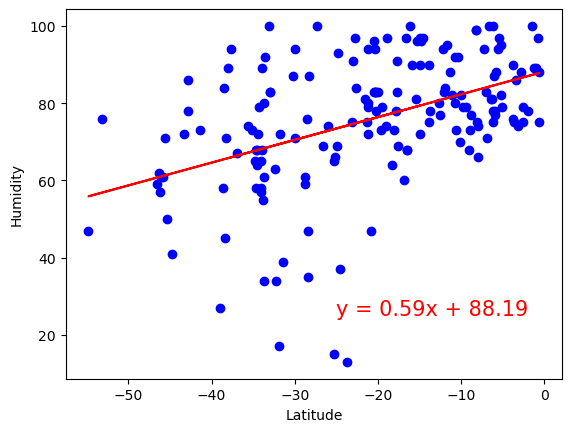

In [106]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df["Humidity"], (-25, 25))
plt.ylabel('Humidity')

**Discussion about the linear relationship:** Both of northern hemisphere and southern hemisphere's r-values in the section are lower than (+-0.5) so the linear relationship between latitude and humidity are low. However, the outliers of scatterplot can skew the correlation coefficient, so when remove the extreme outliers the r-value will be relativley higher.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26883033944364104


Text(0, 0.5, 'Cloudiness')

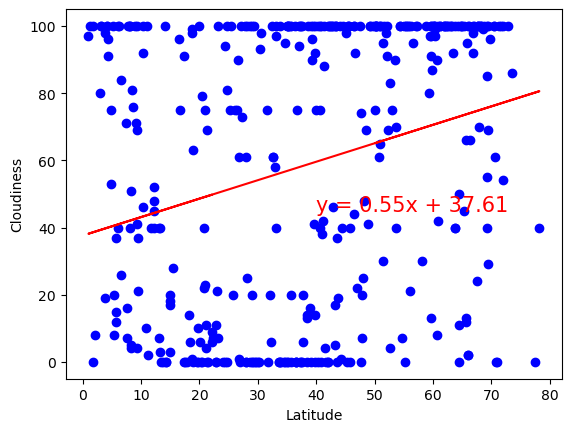

In [108]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"], (40, 45))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: 0.5446340614425857


Text(0, 0.5, 'Cloudiness')

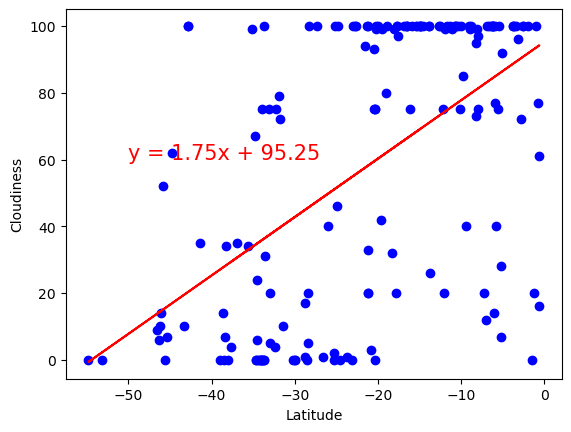

In [110]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"], (-50, 60))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:**The linear correlation between latitude and cloudiness is not very strong, so we can assume there are other factors affecting the intensity of cloud.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15662573854988995


Text(0, 0.5, 'Wind Speed')

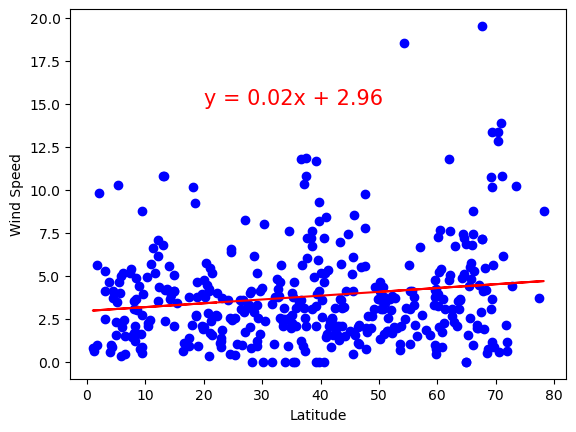

In [111]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"], (20, 15.0))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is: -0.14184247583996584


Text(0, 0.5, 'Wind Speed')

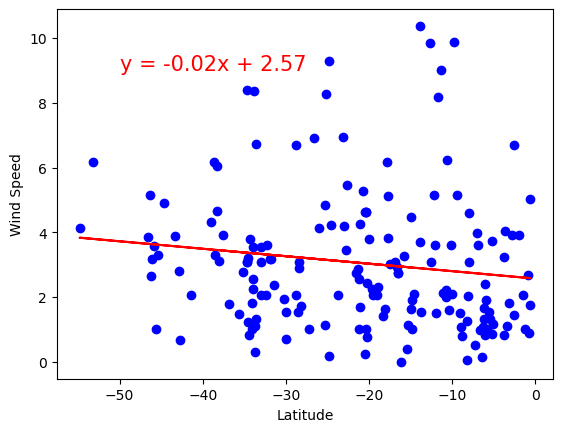

In [113]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"], (-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed is very week, so the distance of equator is not the main factor affecting the wind speed. 